# Arguments

In [1]:
# inceptionv3-ft-pv-self-eb,ap,lm,ct

num_of_epochs = 100
batch_size = 32

final_model_path= 'model-final.h5'

input_width = 224
input_height = 224
input_depth = 3


# Select validation classes

In [2]:
class_paths_validation = ['../datasets/validation/___Early_blight', '../datasets/validation/___Appids', '../datasets/validation/___Leaf_miner', '../datasets/self/___Curly_top_virus']

In [3]:
class_path = '../datasets/validation/___Leaf_miner'

class_labels = ['___Early_blight', '___Appids', '___Leaf_miner', '___Curly_top_virus']

# Load dataset

In [4]:
from imutils import paths
import numpy as np
import os

import sys
sys.path.append('..')

from utils.preprocessors.aspect_aware_preprocessor import AspectAwarePreprocessor
from utils.preprocessors.image_to_array_preprocessor import ImageToArrayPreprocessor
from utils.io.simple_dataset_loader import SimpleDatasetLoader

print("[INFO] loading images...")
image_paths = list(paths.list_images(class_path))

# Initial image preprocessing
aap = AspectAwarePreprocessor(input_width, input_height)
iap= ImageToArrayPreprocessor()

#Load image data and perform image data preprocessing
sdl = SimpleDatasetLoader(preprocessors=[aap,iap])
(test_x,test_y)  = sdl.load(image_paths,verbose=500)
test_x = test_x.astype("float") / 255.0


Using TensorFlow backend.


[INFO] loading images...


# Load model from disk

In [5]:
# import tensorflow as tf
# print(tf.__version__)


# model = tf.keras.models.load_model(
#     final_model_path,
#     custom_objects=None,
#     compile=False
# )

from keras.models import load_model

model = load_model(final_model_path)

# Make predictions

In [6]:
# Make predictions on the images
print("[INFO] Predicting...")
predictions = model.predict(test_x, batch_size=batch_size).argmax(axis=1)

[INFO] Predicting...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


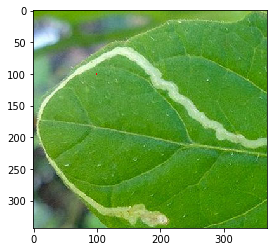

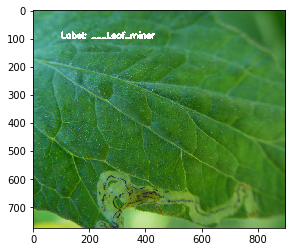

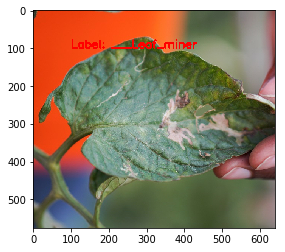

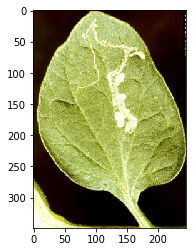

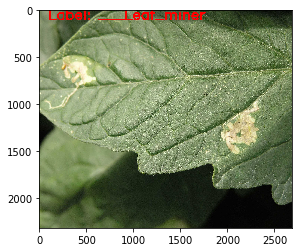

In [7]:
import cv2
import matplotlib.pyplot as plt
import time

# loop over the sample images
for (i, image_path) in enumerate(image_paths):
    # Load the example image, draw the prediction, and display it
    image = plt.imread(image_path)
    color = (0, 255, 0)
    if(predictions[i] == 2):
        color = (255, 0, 0)
        font_size = int(image.shape[1] * (0.2/100))
        font_thickness = int(image.shape[1] * (0.2/30))
        cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, font_thickness)
        plt.subplots(1, 1)
        plt.imshow(image)


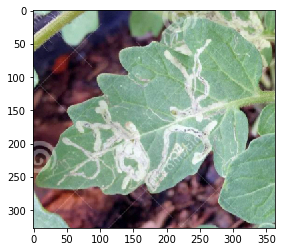

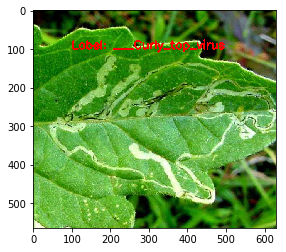

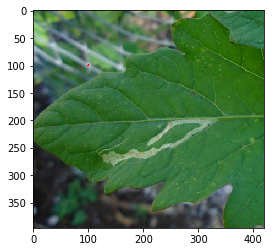

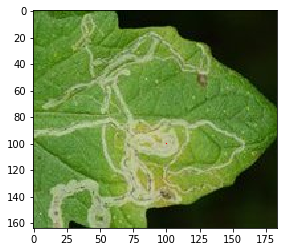

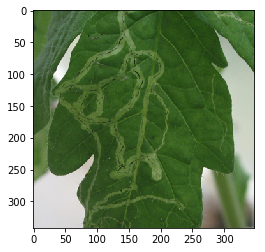

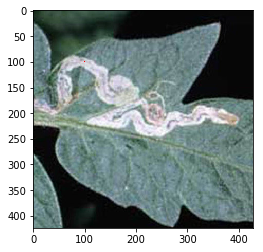

In [8]:
import cv2
import matplotlib.pyplot as plt
import time

# loop over the sample images
for (i, image_path) in enumerate(image_paths):
    # Load the example image, draw the prediction, and display it
    image = plt.imread(image_path)
    color = (0, 255, 0)
    if(predictions[i] != 2):
        color = (255, 0, 0)
        font_size = int(image.shape[1] * (0.2/100))
        font_thickness = int(image.shape[1] * (0.2/30))
        cv2.putText(image, "Label: {}".format(class_labels[predictions[i]]), (100, 100), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, font_thickness)
        plt.subplots(1, 1)
        plt.imshow(image)
